In [10]:
import networkx as nx
import sys
import matplotlib.pyplot as plt
import random
import numpy as np
from numpy import linalg as LA
from scipy.sparse import csr_matrix 
from scipy.sparse.linalg import eigs

def createGraph(filename):
    graphFile = open(filename)
    edges = graphFile.read().splitlines()
    vertices = range(int(edges[0].split(' ')[0]))
    edges = map( lambda x: (int(x.split(' ')[0]),int(x.split(' ')[1])) , edges[1:] )
    g = nx.Graph()
    g.add_nodes_from(vertices)
    g.add_edges_from(edges)
    return g

graph = createGraph("static.network")


Policy A: Select k  random nodes for immunization.

Strength of virus for immunized network is: (12.3313825158+0j)


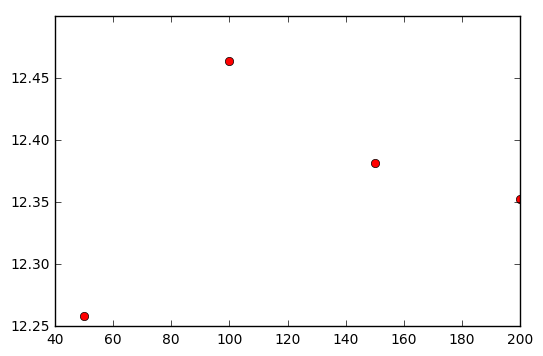

In [11]:
def immunize_k_random(graph, k):
    nodes = nx.number_of_nodes(graph)
    rand_nodes = random.sample(range(0, nodes), k)
    new_graph = graph.copy()
    new_graph.remove_nodes_from(rand_nodes)
    
    return new_graph

def immunize_k_highest_degree(graph, k):
    degrees = graph.degree()
    sorted_degrees = sorted(degrees, key=degrees.get)
    highest_degrees = sorted_degrees[-k:]
    new_graph = graph.copy()
    new_graph.remove_nodes_from(highest_degrees)
    
    return new_graph

def immunize_k(graph, k):
    degrees = graph.degree()
    sorted_degrees = sorted(degrees, key=degrees.get)
    highest_degrees = sorted_degrees[-k:]
    new_graph = graph.copy()
    
    for vertex in reversed(highest_degrees):
        new_graph.remove_node(vertex)
        degrees = new_graph.degree()
        sorted_degrees = sorted(degrees, key=degrees.get)
        highest_degrees = sorted_degrees[-k:]
    
    return new_graph

def immunize_k_eigenvalues(graph, k):
    
    A= nx.adjacency_matrix(graph)
    A2 = csr_matrix(A,dtype=np.float)
    w,v = eigs(A2)
    
    lrgst_ev_index = np.argmax(w)
    largest_vector = v[:,lrgst_ev_index]
    nodes = np.argsort(largest_vector)
    nodes = nodes[-k:]
    
    new_graph = graph.copy()
    new_graph.remove_nodes_from(nodes)
    
    return new_graph

def get_strength(lambda1, beta, delta):
    return lambda1*(beta/delta)


k_values = np.arange(50,250,50)
beta = 0.2
delta = 0.7

print("\nPolicy A: Select k  random nodes for immunization.")
immunized_graph_policyA = immunize_k_random(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyA)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(get_strength(lambda1,0.2,0.7)))

strengths = []
for k in k_values:
    immunized_graph_policyA = immunize_k_random(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyA)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))

plt.plot(k_values, strengths, 'ro')
plt.show()




Policy B: Select the k  nodes with highest degree for immunization.

Strength of virus for immunized network is: (1.08027548024+0j)


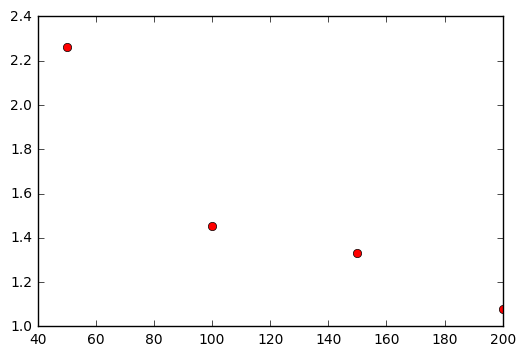

In [12]:
print("\nPolicy B: Select the k  nodes with highest degree for immunization.")
immunized_graph_policyB = immunize_k_highest_degree(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyB)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(get_strength(lambda1,0.2,0.7)))

strengths = []
for k in k_values:
    immunized_graph_policyB = immunize_k_highest_degree(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyB)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))
    

plt.plot(k_values, strengths, 'ro')
plt.show()




Policy   C:   Select   the   node   with   the   highest   degree   for   immunization.   Remove   this   node   (and   its  incident edges) from the contact network. Repeat until all vaccines are administered. 

Strength of virus for immunized network is: (1.08027548024+0j)


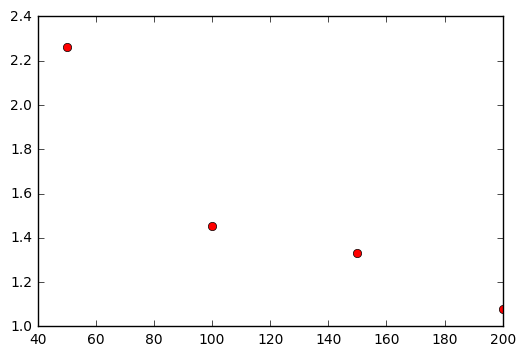

In [13]:
print("\nPolicy   C:   Select   the   node   with   the   highest   degree   for   immunization.   Remove   this   node   (and   its  incident edges) from the contact network. Repeat until all vaccines are administered. ")
immunized_graph_policyC = immunize_k(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyC)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)

print("\nStrength of virus for immunized network is: "+str(get_strength(lambda1,0.2,0.7)))

strengths = []
for k in k_values:
    immunized_graph_policyC = immunize_k_highest_degree(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyC)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strengths.append(lambda1*(beta/delta))
    

plt.plot(k_values, strengths, 'ro')
plt.show()




Policy   D:   Find   the   eigenvector   corresponding   to   the   largest   eigenvalue   of   the   contact   network’s  adjacency   matrix.   Find   the   ​ k   largest   (absolute)   values   in   the   eigenvector.   Select   the   ​ k   nodes   at   the  corresponding positions in the eigenvector. 

Strength of virus for immunized network is: (3.0705278823+0j)


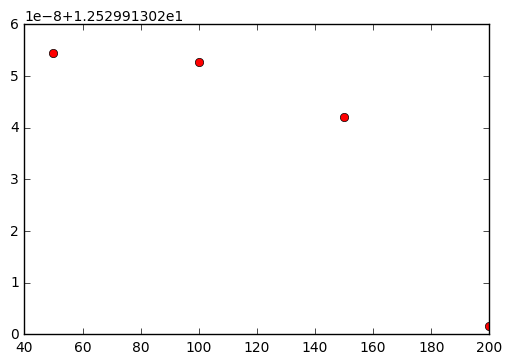

In [14]:
print("Policy   D:   Find   the   eigenvector   corresponding   to   the   largest   eigenvalue   of   the   contact   network’s  adjacency   matrix.   Find   the   ​ k   largest   (absolute)   values   in   the   eigenvector.   Select   the   ​ k   nodes   at   the  corresponding positions in the eigenvector. ")
immunized_graph_policyD = immunize_k_eigenvalues(graph, 200)
A= nx.adjacency_matrix(immunized_graph_policyD)
A2 = csr_matrix(A,dtype=np.float)
eg_val = eigs(A2)[0]
lambda1 = max(eg_val)
print("\nStrength of virus for immunized network is: "+str(lambda1*(beta/delta)))

strn = []
for k in k_values:
    immunized_graph_policyD = immunize_k_eigenvalues(graph, k)
    A= nx.adjacency_matrix(immunized_graph_policyD)
    A2 = csr_matrix(A,dtype=np.float)
    eg_val = eigs(A2)[0]
    lambda1 = max(eg_val)
    strn.append(lambda1*(beta/delta))
    

plt.plot(k_values, strn, 'ro')
plt.show()